In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import integrate

### Zadanie.

Przeprowadź analizę rozwiązań dla zagadnienia oscylatora Duffinga:
$$x''(t) = - \delta x'(t) - \beta x(t) - \alpha x^3(t) + \gamma \cos\omega t, \quad x(0) = x_0, \, x'(0) = v_0.$$
Użyj parametrów $\alpha = 1$, $\beta = -1$, $\gamma = 0{,}3$, $\delta = 0{,}2$, $x_0 = \pi/6$, $v_0 = 0$.

Parametr $\omega$ rozważ w dwóch różnych przypadkach: $\omega = 0{,}7$ oraz $\omega = 1{,}0$. W obu przypadkach:
* narysuj wykres rozwiązania (zależność $x(t)$),
* narysu trajektorię rozwiązania w przestrzeni fazowej (zależność $x'$ od $x$),
* nanieś na powyższy obraz wykres Poincare dla tego zagadnienia.

Czy któreś z rozwiązań można opisać jako chaotyczne?

In [7]:
x0 = np.pi/6
v0 = 0
alfa = 1
beta = -1
gamma = 0.3
delta = 0.2
torque = lambda t: gamma * np.cos(omega * t)
def duff_oscillator(t, x, alfa, beta, delta, torque):
    """
    Prawa strona układu równań oscylatora Duffinga
    """
    z0 = x[1]
    z1 = torque(t) - delta * x[1] - beta * x[0] - alfa * (x[0])**3
    return [z0, z1]


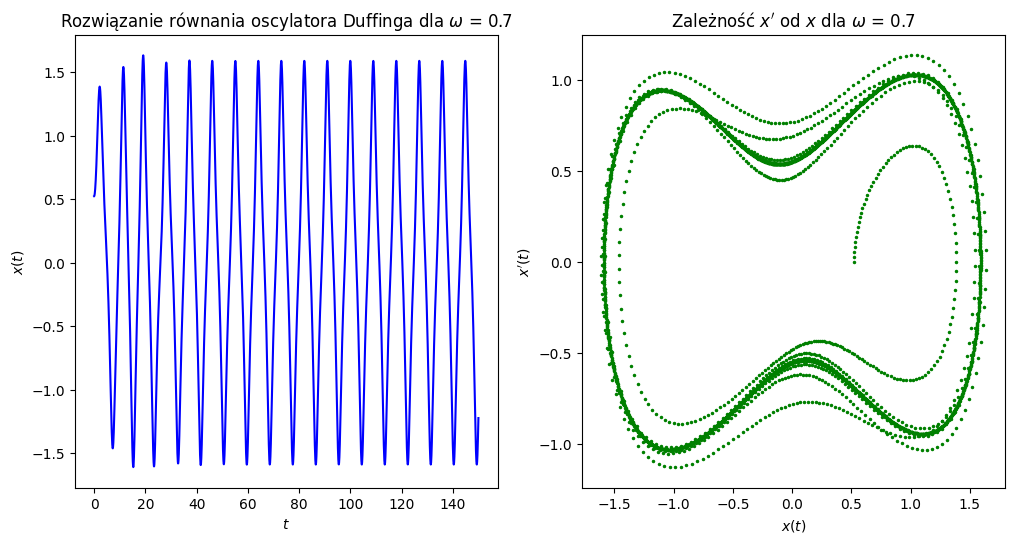

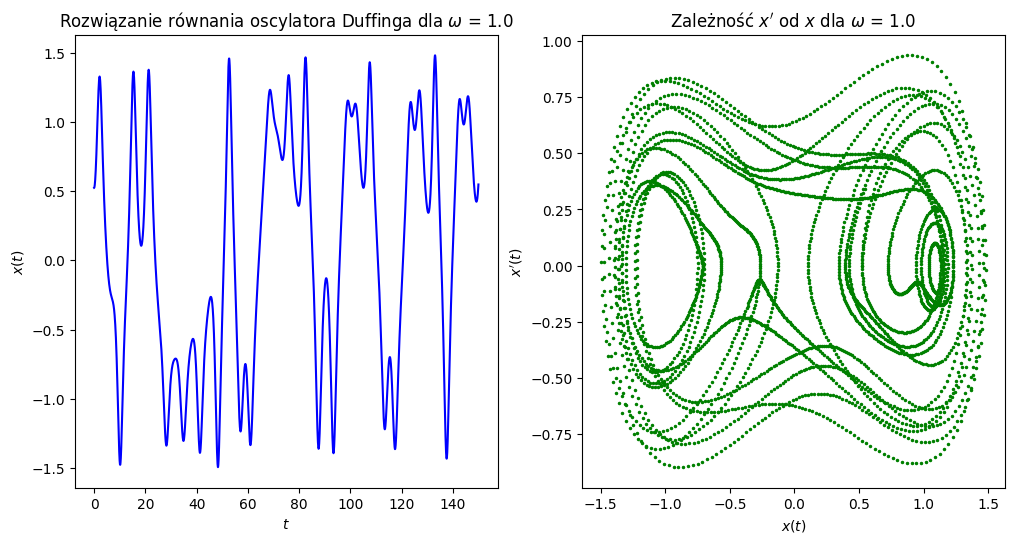

In [40]:
t_span = [0, 150]
T = np.linspace(t_span[0], t_span[1], 3600)
omegas = [0.7, 1.0]
for omega in omegas:
    oscillator = integrate.solve_ivp(duff_oscillator, t_span, [x0, v0], args=(alfa, beta, delta, torque),
                                   method='DOP853', dense_output=True)
    _, axes = plt.subplots(1, 2, figsize=(12, 6), dpi = 100)
    axes[0].plot(T, oscillator.sol(T)[0], 'b')
    axes[0].set_xlabel("$t$")
    axes[0].set_ylabel(r"$x(t)$")
    axes[0].set_title(f'Rozwiązanie równania oscylatora Duffinga dla $\omega$ = {omega}')
    #plt.show()
    oscillator_wrap = - (( - oscillator.sol(T)[0] + np.pi) % (2 * np.pi ) - np.pi)
    velocity_wrap = - (( - oscillator.sol(T)[1] + np.pi) % (2 * np.pi ) - np.pi)
    axes[1].plot(oscillator_wrap, velocity_wrap, 'g.', markersize=3)
    axes[1].set_xlabel("$x(t)$")
    axes[1].set_ylabel("$x'(t)$")
    axes[1].set_title(f'Zależność $x\'$ od $x$ dla $\omega$ = {omega}')
    plt.show()

# Wykresy Poincaré

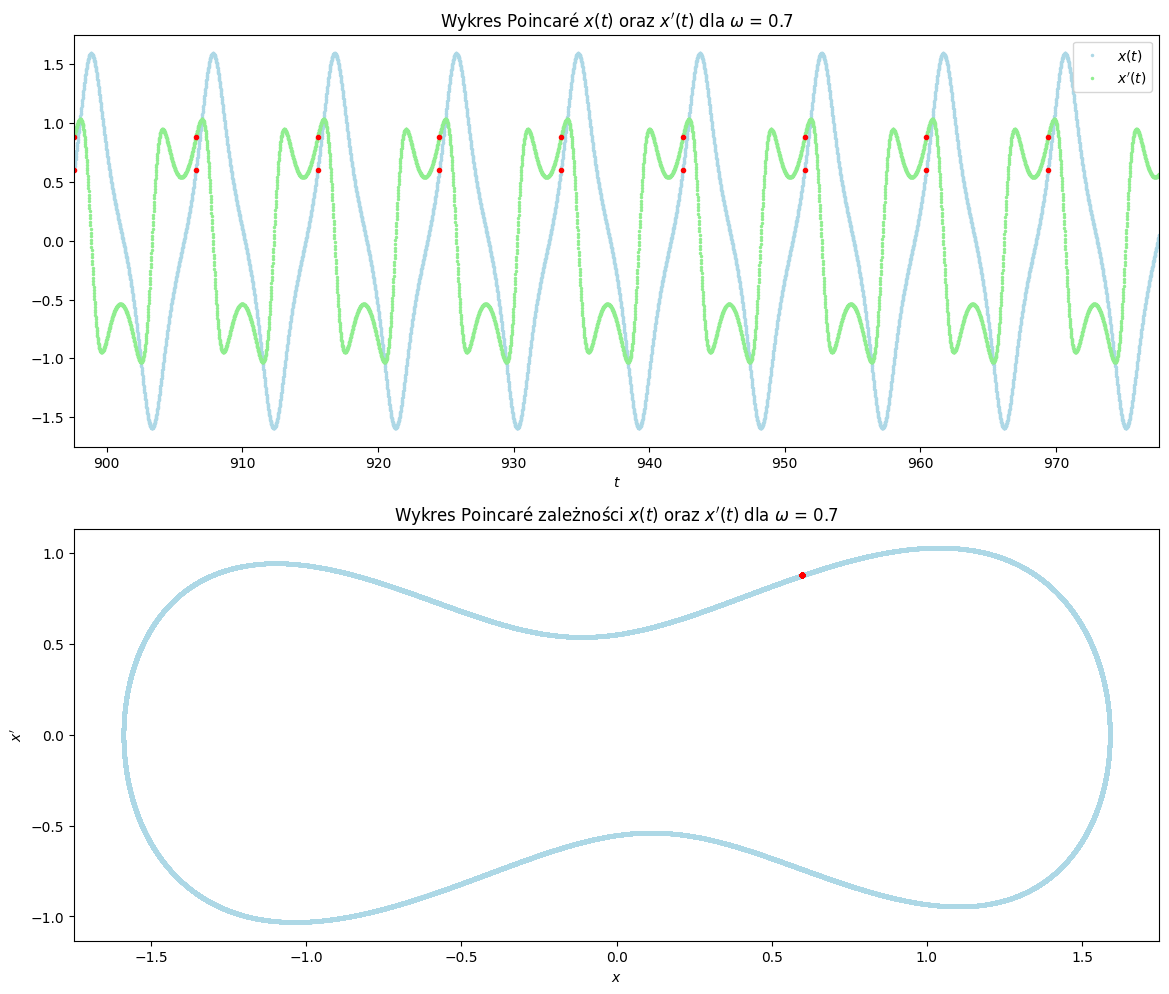

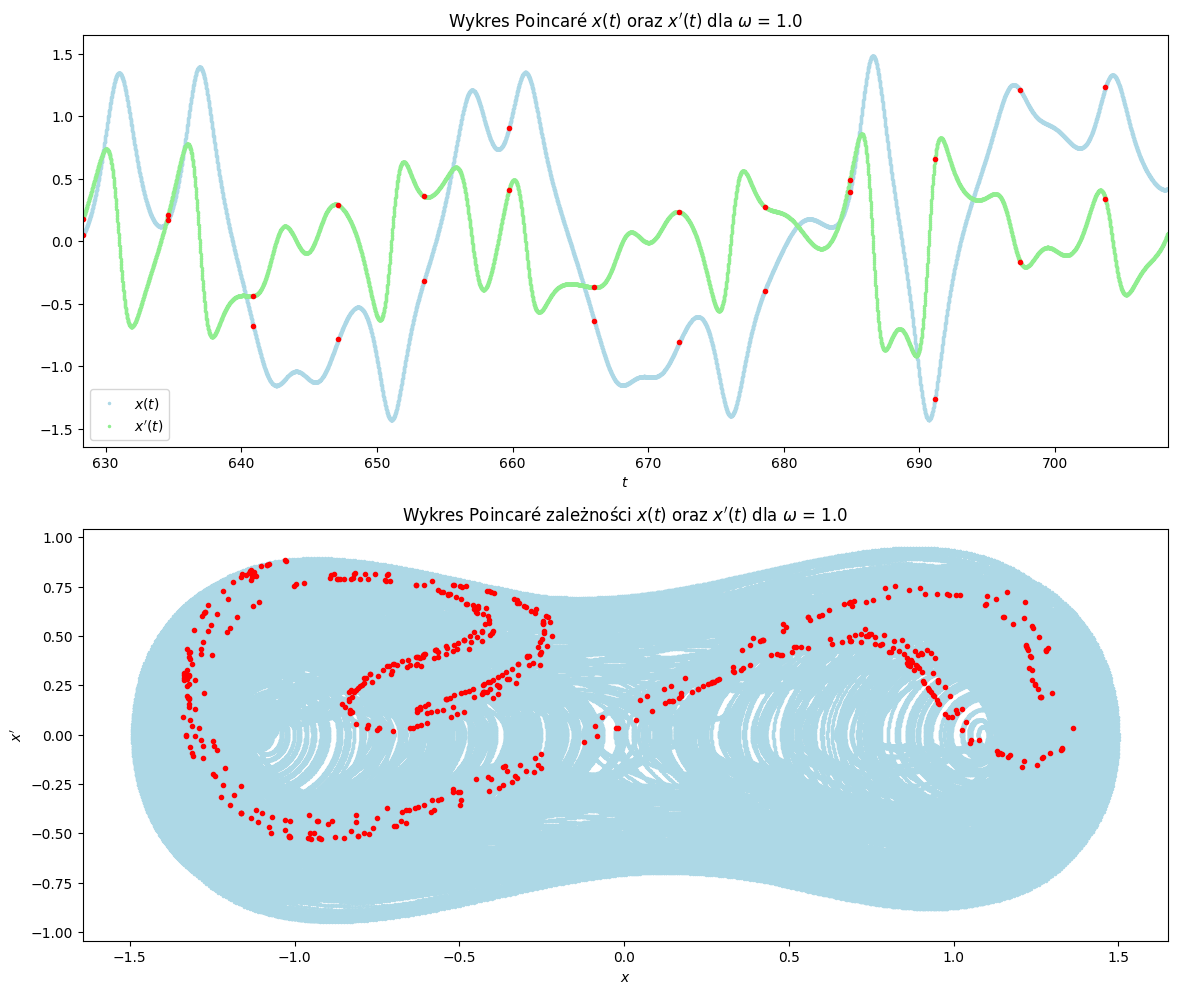

In [63]:
Nstart, Nend = 100, 700
for omega in omegas:
    t_span = [0, Nend * 2 * np.pi / omega]
    T = np.linspace(Nstart * 2 * np.pi / omega, Nend * 2 * np.pi / omega, 400000)
    snap_steps = np.arange(Nstart * 2 * np.pi / omega, Nend * 2 * np.pi / omega, 2 * np.pi / omega)
    
    oscillator = integrate.solve_ivp(duff_oscillator, t_span, [x0, v0], args=(alfa, beta, delta, torque),
                                   method='DOP853', dense_output=True)
    oscillator_wrap = - (( - oscillator.sol(T)[0] + np.pi) % (2 * np.pi ) - np.pi)
    velocity_wrap = - (( - oscillator.sol(T)[1] + np.pi) % (2 * np.pi ) - np.pi)
    
    oscillator_snaps = - (( - oscillator.sol(snap_steps)[0] + np.pi) % (2 * np.pi ) - np.pi)
    velocity_snaps = - (( - oscillator.sol(snap_steps)[1] + np.pi) % (2 * np.pi ) - np.pi)
    
    _, axes = plt.subplots(2, 1, figsize=(14, 12), dpi = 100)
    axes[0].plot(T, oscillator_wrap, '.', color="lightblue", label=r"$x(t)$", markersize=3)
    axes[0].plot(T, velocity_wrap, '.', color="lightgreen", label=r"$x'(t)$", markersize=3)
    axes[0].plot(snap_steps, oscillator_snaps, 'r.', markersize=6)
    axes[0].plot(snap_steps, velocity_snaps, 'r.', markersize=6)
    axes[0].set_xlabel("$t$")
    axes[0].set_xlim(Nstart * 2 * np.pi / omega, Nstart * 2 * np.pi / omega + 80)
    axes[0].legend()
    axes[0].set_title(f'Wykres Poincaré $x(t)$ oraz $x\'(t)$ dla $\omega$ = {omega}')
    axes[1].plot(oscillator_wrap, velocity_wrap, '.', color="lightblue", markersize=3)
    axes[1].plot(oscillator_snaps, velocity_snaps, 'r.')
    axes[1].set_xlabel(r"$x$")
    axes[1].set_ylabel(r"$x'$")
    axes[1].set_title(f'Wykres Poincaré zależności $x(t)$ oraz $x\'(t)$ dla $\omega$ = {omega}')
    plt.show()

### W celu dobrego zobrazowania graniczncyh wartości przyjąłem całkiem szeroki zakres argumentów do stworzenia wykresów Poincaré. Z pewnością rozwiązanie dla $\omega$ = 1.0 można uznać za chaotyczne.